In [1]:
from utils import (
    load_data,
    train_model,
    evaluate_model,
    load_siRF_result,
)
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:
final_results = {}
for name in ["Sim_new"]:
    for rule in ["overlap", "single", "multiple"]:
        for ind in tqdm(range(100)):
            X, y, y_true = load_data(ind, name, rule)
            for weight_scheme in ['depth']:
                y_pred = train_model(X, y, iter=ind, weight_scheme=weight_scheme, bootstrap=True, name=name, rule=rule,
                                     tag="sim_new")
                result = evaluate_model(y_pred, y_true, name, metric='strict')
                final_results[(name, rule, ind, weight_scheme)] = result

  0%|          | 0/100 [00:00<?, ?it/s]

cannot load file ./sim_new.csv, quit.


100%|██████████| 100/100 [38:39<00:00, 23.19s/it]


In [5]:
final_results_medium = {}
for name in ["Sim_new"]:
    for rule in ["overlap", "single", "multiple"]:
        for ind in tqdm(range(100)):
            X, y, y_true = load_data(ind, name, rule)
            for weight_scheme in ['depth']:
                y_pred = train_model(X, y, iter=ind, weight_scheme=weight_scheme, bootstrap=True, name=name, rule=rule,
                                     tag="sim_new_medium")
                result = evaluate_model(y_pred, y_true, name, metric='medium')
                final_results_medium[(name, rule, ind, weight_scheme)] = result

  0%|          | 0/100 [00:00<?, ?it/s]

cannot load file ./sim_new_medium.csv, quit.


100%|██████████| 100/100 [38:01<00:00, 22.81s/it]


In [4]:
final_results_mild = {}
for name in ["Sim_new"]:
    for rule in ["overlap", "single", "multiple"]:
        for ind in tqdm(range(100)):
            X, y, y_true = load_data(ind, name, rule)
            for weight_scheme in ['depth']:
                y_pred = train_model(X, y, iter=ind, weight_scheme=weight_scheme, bootstrap=True, name=name, rule=rule,
                                     tag="sim_new_mild")
                result = evaluate_model(y_pred, y_true, name, metric='mild')
                final_results_mild[(name, rule, ind, weight_scheme)] = result

  0%|          | 0/100 [00:00<?, ?it/s]

cannot load file ./sim_new_mild.csv, quit.


100%|██████████| 100/100 [37:40<00:00, 22.60s/it]


In [7]:
f1 = {
    'Sim_new': 'Gaussian',
}
f2 = {
    'overlap': 'overlap',
    'single': 'single',
    'multiple': 'multiple',
}

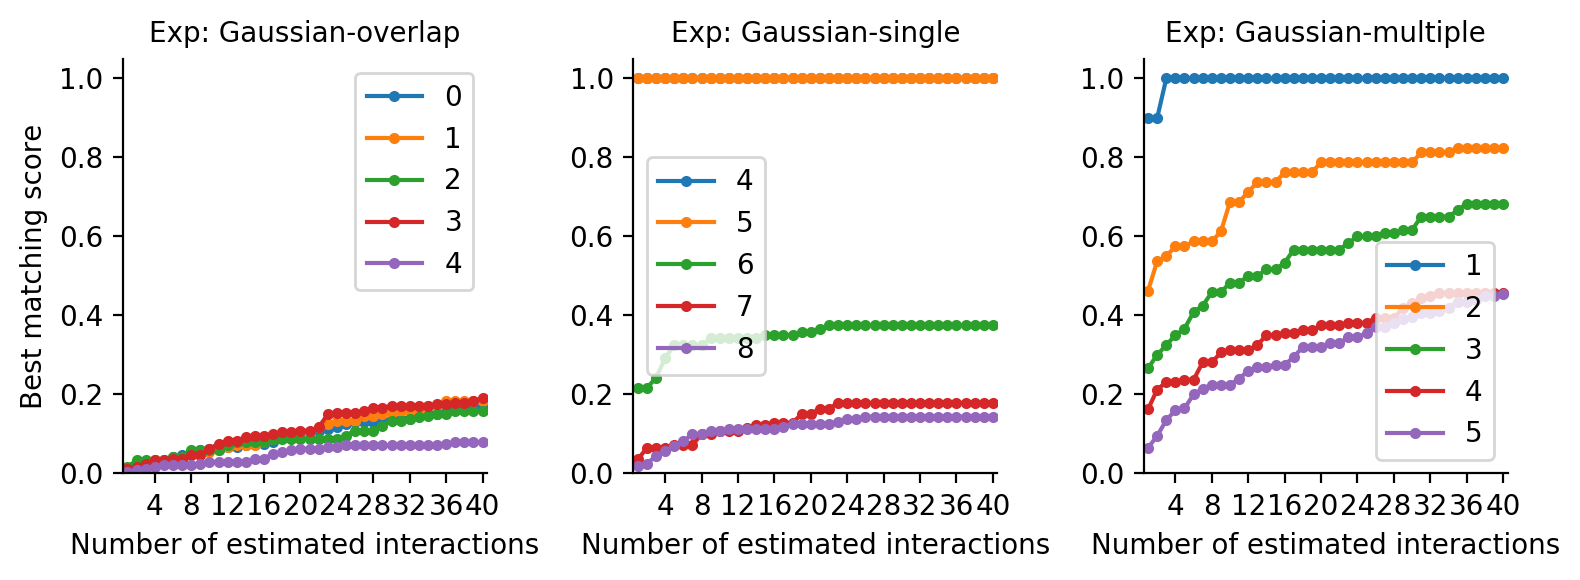

In [15]:
fig, axes = plt.subplots(1,3, figsize=(8,3), sharey=False, dpi=200)
for i, name in enumerate(["Sim_new"]):
    for j, rule in enumerate(["overlap", "single", "multiple"]):
        for k in range(5):
            try:
                # depth weighted 

                ax = axes[j]
                #min_length = np.min([len(v) for x, v in final_results.items() if x[0] == name and x[1] == rule])
                #min_length = min(40, min_length)
                min_length = 40
                scores = []
                for x, v in final_results.items():
                    if x[0] == name and x[1] == rule and x[-1] == 'depth' and x[2]//20 == k:
                        if len(v) < min_length:
                            v = list(v) + [v[-1]] * (min_length - len(v))
                        scores.append(v[:min_length])
                scores = np.array(scores)
                #print(scores)
                ax.errorbar(
                    np.arange(1, min_length+1),
                    np.nanmean(scores, axis=0),
                    marker='.',
                    #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
                )

                # sample size weighted

                #scores = []
                #for x, v in final_results.items():
                #    if x[0] == name and x[1] == rule and x[-1] == 'samplesize':
                #        if len(v) < min_length:
                #            v = list(v) + [np.nan] * (min_length - len(v))
                #        scores.append(v[:min_length])
                #scores = np.array(scores)
                #ax.errorbar(
                #    np.arange(1, min_length+1),
                #    np.nanmean(scores, axis=0),
                #    #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
                #)

                ax.set_ylim([0,1.05])
                ax.set_xlim([0.5, 40.5])
            except e:
                print(e)
                pass
        if rule == 'overlap':
            ax.legend(np.arange(5))
        elif rule == 'single':
            ax.legend(np.arange(4,9))
        else:
            ax.legend(np.arange(1,6))
        ax.set_title("Exp: " + f1[name] + "-" + f2[rule.lower()], fontsize=10)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        if (i == 0 and j == 0) or (i == 1 and j == 0):
            ax.set_ylabel("Best matching score")
        if (i == 0):
            ax.set_xlabel("Number of estimated interactions")
plt.tight_layout()
plt.show()

In [16]:
def is_monotonic(x):
    return (x[1:] >= x[:-1]).all()